In [2]:
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity

In [3]:
%matplotlib notebook

### Hertz-Knudsen

$$
\nu_kin = P_{vap}^{eq} \bigl ( {M \over {2 \pi RT}} \bigr )^{1/2}
$$

In [5]:
def get_nu_kin(T,AssignQuantity):
    P3 = AssignQuantity(611,'Pa'); print(P3)
    T3 = AssignQuantity(273,'K')
    R = AssignQuantity(8.314,'J/mol/K'); print(R)
    M = AssignQuantity(18,'g/mol')
    NA = AssignQuantity(6.02e23,'1/mol')
    rho = AssignQuantity(0.9,'g/cm^3')
    
    # Clausius-Clapeyron
    Delta_H_sub = AssignQuantity(50,'kJ/mol')
    P_vapor_eq = P3*np.exp(-Delta_H_sub/R*(1/T-1/T3)); print(P_vapor_eq)
    
    nu_kin = P_vapor_eq*M**.5/(2*np.pi*R*T)**.5
    nu_kin.ito('gram / micrometer ** 2 / second')
    
    nu_kin /= rho
    nu_kin.ito('micrometer/second')

    return(nu_kin)

611 pascal
8.314 joule / kelvin / mole
[29.55023347583504 43.084505954278974 62.119205753924355 88.61108105920448 125.11462316726998 174.93437330590544 242.30804751673878 332.62495405861375 452.684512701508 611.0] pascal
micrometer / second


<IPython.core.display.Javascript object>


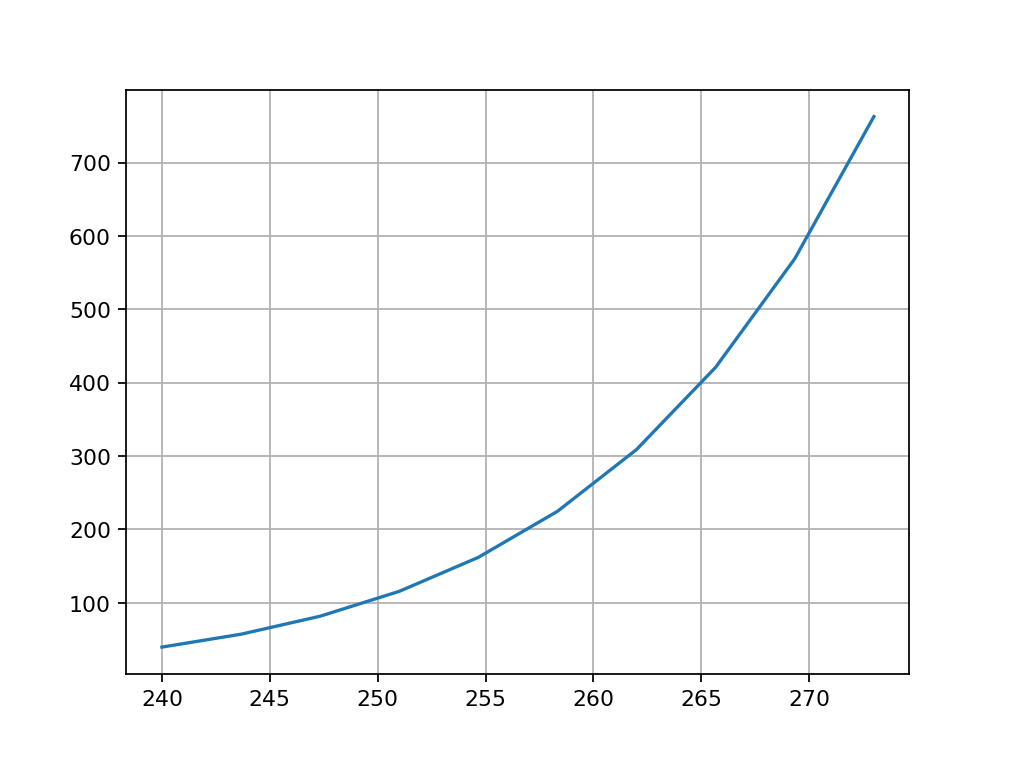

In [8]:
T = AssignQuantity(np.linspace(240,273,10),'K')
nu_kin = get_nu_kin(T,AssignQuantity)
print(nu_kin.units)

plt.figure()
plt.plot(T.magnitude,nu_kin.magnitude)
plt.grid(True)


[29.55023347583504 43.084505954278974 62.119205753924355 88.61108105920448 125.11462316726998 174.93437330590544 242.30804751673878 332.62495405861375 452.684512701508 611.0] pascal


gram / micrometer ** 2 / second
micrometer / second


<IPython.core.display.Javascript object>


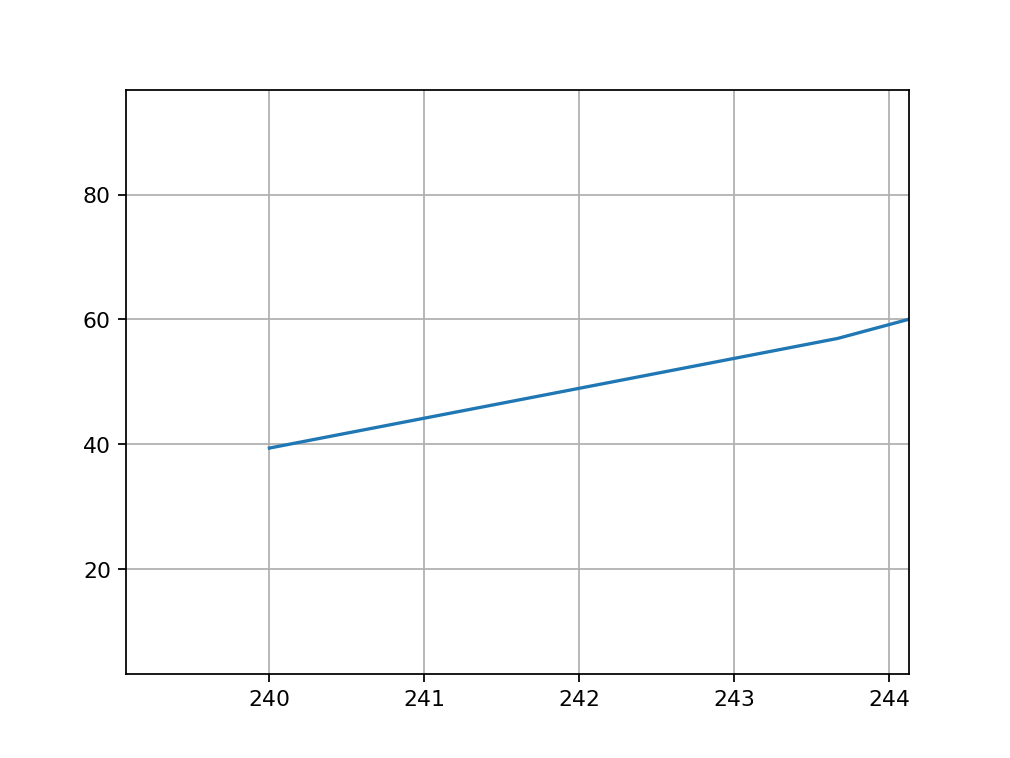

In [5]:
nu_kin = P_vapor_eq*M**.5/(2*np.pi*R*T)**.5
nu_kin.ito('gram / micrometer ** 2 / second')
print(nu_kin.units)
nu_kin /= rho
nu_kin.ito('micrometer/second')
print(nu_kin.units)

plt.figure()
plt.plot(T.magnitude,nu_kin.magnitude)
plt.grid(True)

In [6]:
# # This is the formula from https://en.wikipedia.org/wiki/Hertz%E2%80%93Knudsen_equation
# nu_kin = P_vapor_eq/(2*np.pi*M*R*T)**.5
# nu_kin.ito('mol/second/micrometer^2')
# print(nu_kin.units)

# nu_kin *= M
# print(nu_kin.units)

# nu_kin /= rho
# nu_kin.ito('micrometer/second')
# print(nu_kin.units)